In [1]:
from tensorflow.contrib.timeseries.python.timeseries.estimators import TimeSeriesRegressor

/home/cvdev/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
# coding : utf-8
from __future__ import print_function
import numpy as np
import matplotlib
matplotlib.use("agg")
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader

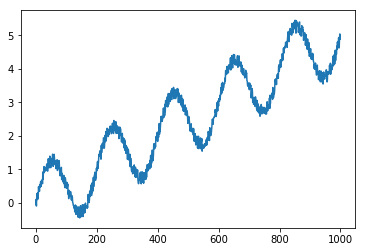

In [2]:
x = np.array(range(1000))
noise = np.random.uniform(-0.2,0.2,1000)
y = np.sin(np.pi * x / 100) + x/200. + noise
plt.plot(x,y)

In [3]:
data = {"times":x, "values":y}

In [4]:
reader = NumpyReader(data)

In [5]:
reader

In [7]:
with tf.Session() as sess:
    full_data = reader.read_full() # 生成队列
    # print(sess.run(full_data))
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord) # 启动队列
    r = sess.run(full_data)

In [9]:
type(r)

dict

In [11]:
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size=2, window_size=20)

In [30]:
with tf.Session() as sess:
    batch_data = train_input_fn.create_batch()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    one_batch = sess.run(batch_data[0])
    # x = sess.run(batch_data[1])
    print(type(batch_data))
    print(len(batch_data))
    
    coord.request_stop()

print('one_batch_data:', one_batch)
print(one_batch["times"].shape) # (batch_size, Tx)

<class 'tuple'>
2
one_batch_data: {'times': array([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39],
       [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60]]), 'values': array([[[ 0.61365848],
        [ 0.68848007],
        [ 0.57163741],
        [ 0.9030405 ],
        [ 0.69422892],
        [ 0.94334761],
        [ 0.89070837],
        [ 1.08154223],
        [ 0.91630086],
        [ 1.01631187],
        [ 0.95427912],
        [ 1.01176581],
        [ 1.05266998],
        [ 0.95943676],
        [ 1.05425156],
        [ 1.08316101],
        [ 1.16107351],
        [ 1.15430356],
        [ 0.97021056],
        [ 0.9459921 ]],

       [[ 1.31639958],
        [ 1.15197451],
        [ 1.05744256],
        [ 1.0471289 ],
        [ 1.19406867],
        [ 1.39336611],
        [ 1.20794486],
        [ 1.30151866],
        [ 1.05011309],
        [ 1.2271387 ],
        [ 1.26891719],
        [ 1.15209808],
        [ 1.